In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("kidney.csv")

In [3]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
data.shape

(400, 26)

In [5]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
data = data.drop(columns=['id'])

In [7]:
data.head(100)

age     bp     sg   al   su     rbc        pc         pcc          ba  \
0   48.0   80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1    7.0   50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   62.0   80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   48.0   70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   51.0   80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..   ...    ...    ...  ...  ...     ...       ...         ...         ...   
95  62.0   90.0  1.015  1.0  0.0     NaN    normal  notpresent  notpresent   
96  60.0   80.0  1.010  1.0  1.0     NaN    normal  notpresent  notpresent   
97  65.0   60.0  1.015  1.0  0.0     NaN    normal  notpresent  notpresent   
98  50.0  140.0    NaN  NaN  NaN     NaN       NaN  notpresent  notpresent   
99  56.0  180.0    NaN  0.0  4.0     NaN  abnormal  notpresent  notpresent   

      bgr  ...  pcv     wc   rc  htn   dm  cad appet   pe  ane classification  
0   121.0  ...   44   7800  5.2  yes  yes   no  good   no   no            ckd  
1     NaN  ...   38   6000  NaN   no   no   no  good   no   no            ckd  
2   423.0  ...   31   7500  NaN   no  yes   no  poor   no  yes            ckd  
3   117.0  ...   32   6700  3.9  yes   no   no  poor  yes  yes            ckd  
4   106.0  ...   35   7300  4.6   no   no   no  good   no   no            ckd  
..    ...  ...  ...    ...  ...  ...  ...  ...   ...  ...  ...            ...  
95   94.0  ...  NaN    NaN  NaN  yes   no   no  good  yes  yes            ckd  
96  172.0  ...   36    NaN  NaN   no  yes  yes  poor   no   no            ckd  
97   91.0  ...   32   9100  4.0  yes  yes   no  poor  yes   no            ckd  
98  101.0  ...   18   5800  2.3  yes  yes   no  poor   no  yes            ckd  
99  298.0  ...   32  10400  4.2  yes  yes   no  poor  yes   no            ckd  

[100 rows x 25 columns]

In [8]:
# Extracting categorical and numerical columns

cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']

In [9]:
for col in cat_cols:
    print(f"{col} has {data[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

pcv has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values

wc has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '74

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [11]:
data.describe()

age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo  
count  381.000000  383.000000  313.000000  312.000000  348.000000  
mean    57.425722    3.072454  137.528754    4.627244   12.526437  
std     50.503006    5.741126   10.408752    3.193904    2.912587  
min      1.500000    0.400000    4.500000    2.500000    3.100000  
25%     27.000000    0.900000  135.000000    3.800000   10.300000  
50%     42.000000    1.300000  138.000000    4.400000   12.650000  
75%     66.000000    2.800000  142.000000    4.900000   15.000000  
max    391.000000   76.000000  163.000000   47.000000   17.800000

In [12]:
# rename column names to make it more user-friendly

data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [13]:
data.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  44                    7800                   5.2   
1                  38                    6000                   NaN   
2                  31                    7500                   NaN   
3                  32                    6700                   3.9   
4                  35                    7300                   4.6   

   hypertension  diabetes_mellitus coronary_artery_disease appetite  \
0           yes                yes                      no     good   
1            no                 no                      no     good   
2            no                yes                      no     poor   
3           yes                 no                      no     poor   
4            no                 no                      no     good   

  peda_edema aanemia class  
0         no      no   ckd  
1         no      no   ckd  
2         no     yes   ckd  
3        yes     yes   ckd  
4         no      no   ckd  

[5 rows x 25 columns]

In [14]:
# replace incorrect values

data['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

data['coronary_artery_disease'] = data['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

data['class'] = data['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

C:\Users\USER\AppData\Local\Temp\ipykernel_11532\3082111018.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)


In [15]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']

for col in cat_cols:
    print(f"{col} has {data[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

packed_cell_volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] values

white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '

In [16]:
# Remove leading and trailing whitespaces in columns and replace '\t?' with NaN
columns_to_clean = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

for column in columns_to_clean:
    data[column] = data[column].apply(lambda x: str(x).strip().replace('\t', '').replace('?', 'NaN'))

for column in columns_to_clean:
    data[column] = pd.to_numeric(data[column], errors='coerce')


for column in columns_to_clean:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)


categorical_columns = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
                       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 
                       'appetite', 'peda_edema', 'aanemia']

for column in categorical_columns:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)


print(data.head())


    age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0          normal   
1   7.0            50.0             1.020      4.0    0.0          normal   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0

C:\Users\USER\AppData\Local\Temp\ipykernel_11532\3874533671.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(median_value, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_11532\3874533671.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [17]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']

for col in cat_cols:
    print(f"{col} has {data[col].unique()} values\n")


red_blood_cells has ['normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal'] values

pus_cell_clumps has ['notpresent' 'present'] values

bacteria has ['notpresent' 'present'] values

hypertension has ['yes' 'no'] values

diabetes_mellitus has ['yes' 'no'] values

coronary_artery_disease has ['no' 'yes'] values

appetite has ['good' 'poor'] values

peda_edema has ['no' 'yes'] values

aanemia has ['no' 'yes'] values

class has ['ckd' 'not ckd'] values



In [18]:
data.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0          normal   
1   7.0            50.0             1.020      4.0    0.0          normal   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   4.8   
2                31.0                  7500.0                   4.8   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0           yes                yes                       no      good   
1            no                 no                       no      good   
2            no                yes                       no      poor   
3           yes                 no                       no      poor   
4            no                 no                       no      good   

   peda_edema aanemia class  
0          no      no   ckd  
1          no      no   ckd  
2          no     yes   ckd  
3         yes     yes   ckd  
4          no      no   ckd  

[5 rows x 25 columns]

In [19]:
data.isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
red_blood_cells             0
pus_cell                    0
pus_cell_clumps             0
bacteria                    0
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume          0
white_blood_cell_count      0
red_blood_cell_count        0
hypertension                0
diabetes_mellitus           0
coronary_artery_disease     0
appetite                    0
peda_edema                  0
aanemia                     0
class                       0
dtype: int64

In [20]:
data['class'] = data['class'].replace({'ckd': 0, 'not ckd': 1})

C:\Users\USER\AppData\Local\Temp\ipykernel_11532\1114551937.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['class'] = data['class'].replace({'ckd': 0, 'not ckd': 1})


In [21]:
data.head(50)

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0   48.0            80.0             1.020      1.0    0.0          normal   
1    7.0            50.0             1.020      4.0    0.0          normal   
2   62.0            80.0             1.010      2.0    3.0          normal   
3   48.0            70.0             1.005      4.0    0.0          normal   
4   51.0            80.0             1.010      2.0    0.0          normal   
5   60.0            90.0             1.015      3.0    0.0          normal   
6   68.0            70.0             1.010      0.0    0.0          normal   
7   24.0             NaN             1.015      2.0    4.0          normal   
8   52.0           100.0             1.015      3.0    0.0          normal   
9   53.0            90.0             1.020      2.0    0.0        abnormal   
10  50.0            60.0             1.010      2.0    4.0          normal   
11  63.0            70.0             1.010      3.0    0.0        abnormal   
12  68.0            70.0             1.015      3.0    1.0          normal   
13  68.0            70.0               NaN      NaN    NaN          normal   
14  68.0            80.0             1.010      3.0    2.0          normal   
15  40.0            80.0             1.015      3.0    0.0          normal   
16  47.0            70.0             1.015      2.0    0.0          normal   
17  47.0            80.0               NaN      NaN    NaN          normal   
18  60.0           100.0             1.025      0.0    3.0          normal   
19  62.0            60.0             1.015      1.0    0.0          normal   
20  61.0            80.0             1.015      2.0    0.0        abnormal   
21  60.0            90.0               NaN      NaN    NaN          normal   
22  48.0            80.0             1.025      4.0    0.0          normal   
23  21.0            70.0             1.010      0.0    0.0          normal   
24  42.0           100.0             1.015      4.0    0.0          normal   
25  61.0            60.0             1.025      0.0    0.0          normal   
26  75.0            80.0             1.015      0.0    0.0          normal   
27  69.0            70.0             1.010      3.0    4.0          normal   
28  75.0            70.0               NaN      1.0    3.0          normal   
29  68.0            70.0             1.005      1.0    0.0        abnormal   
30   NaN            70.0               NaN      NaN    NaN          normal   
31  73.0            90.0             1.015      3.0    0.0          normal   
32  61.0            90.0             1.010      1.0    1.0          normal   
33  60.0           100.0             1.020      2.0    0.0        abnormal   
34  70.0            70.0             1.010      1.0    0.0          normal   
35  65.0            90.0             1.020      2.0    1.0        abnormal   
36  76.0            70.0             1.015      1.0    0.0          normal   
37  72.0            80.0               NaN      NaN    NaN          normal   
38  69.0            80.0             1.020      3.0    0.0        abnormal   
39  82.0            80.0             1.010      2.0    2.0          normal   
40  46.0            90.0             1.010      2.0    0.0          normal   
41  45.0            70.0             1.010      0.0    0.0          normal   
42  47.0           100.0             1.010      0.0    0.0          normal   
43  35.0            80.0             1.010      1.0    0.0        abnormal   
44  54.0            80.0             1.010      3.0    0.0        abnormal   
45  54.0            80.0             1.020      3.0    0.0          normal   
46  48.0            70.0             1.015      0.0    0.0          normal   
47  11.0            80.0             1.010      3.0    0.0          normal   
48  73.0            70.0             1.005      0.0    0.0          normal   
49  60.0            70.0             1.010      2.0    0.0          normal   

    pus_cell pus_cell_clum

In [22]:
distribution = data['class'].value_counts() * 100 / len(data)
distribution

class
0    62.5
1    37.5
Name: count, dtype: float64

In [23]:
percentage_0 = distribution[0]
percentage_1 = distribution[1]
percentage_0 - percentage_1

25.0

In [24]:
#Histograme -> Age

<Axes: xlabel='class'>

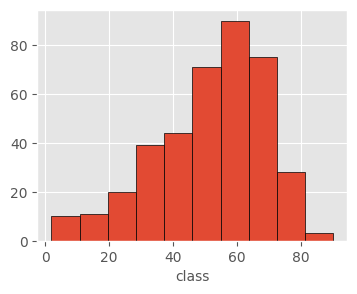

In [25]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

plt.figure(figsize=(4,3))
plt.xlabel('age',fontsize=10)
plt.xlabel('class',fontsize=10)
data.age.hist(edgecolor="black")

In [26]:
print("Max_Age: " + str(data.age.max()) + "\n" + "Min_Age: " + str(data.age.min()))

Max_Age: 90.0
Min_Age: 2.0


In [27]:
#densiti graphs

#column = 2 figures
#rows = 12

In [28]:
import seaborn as sns
sns.set()

In [29]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

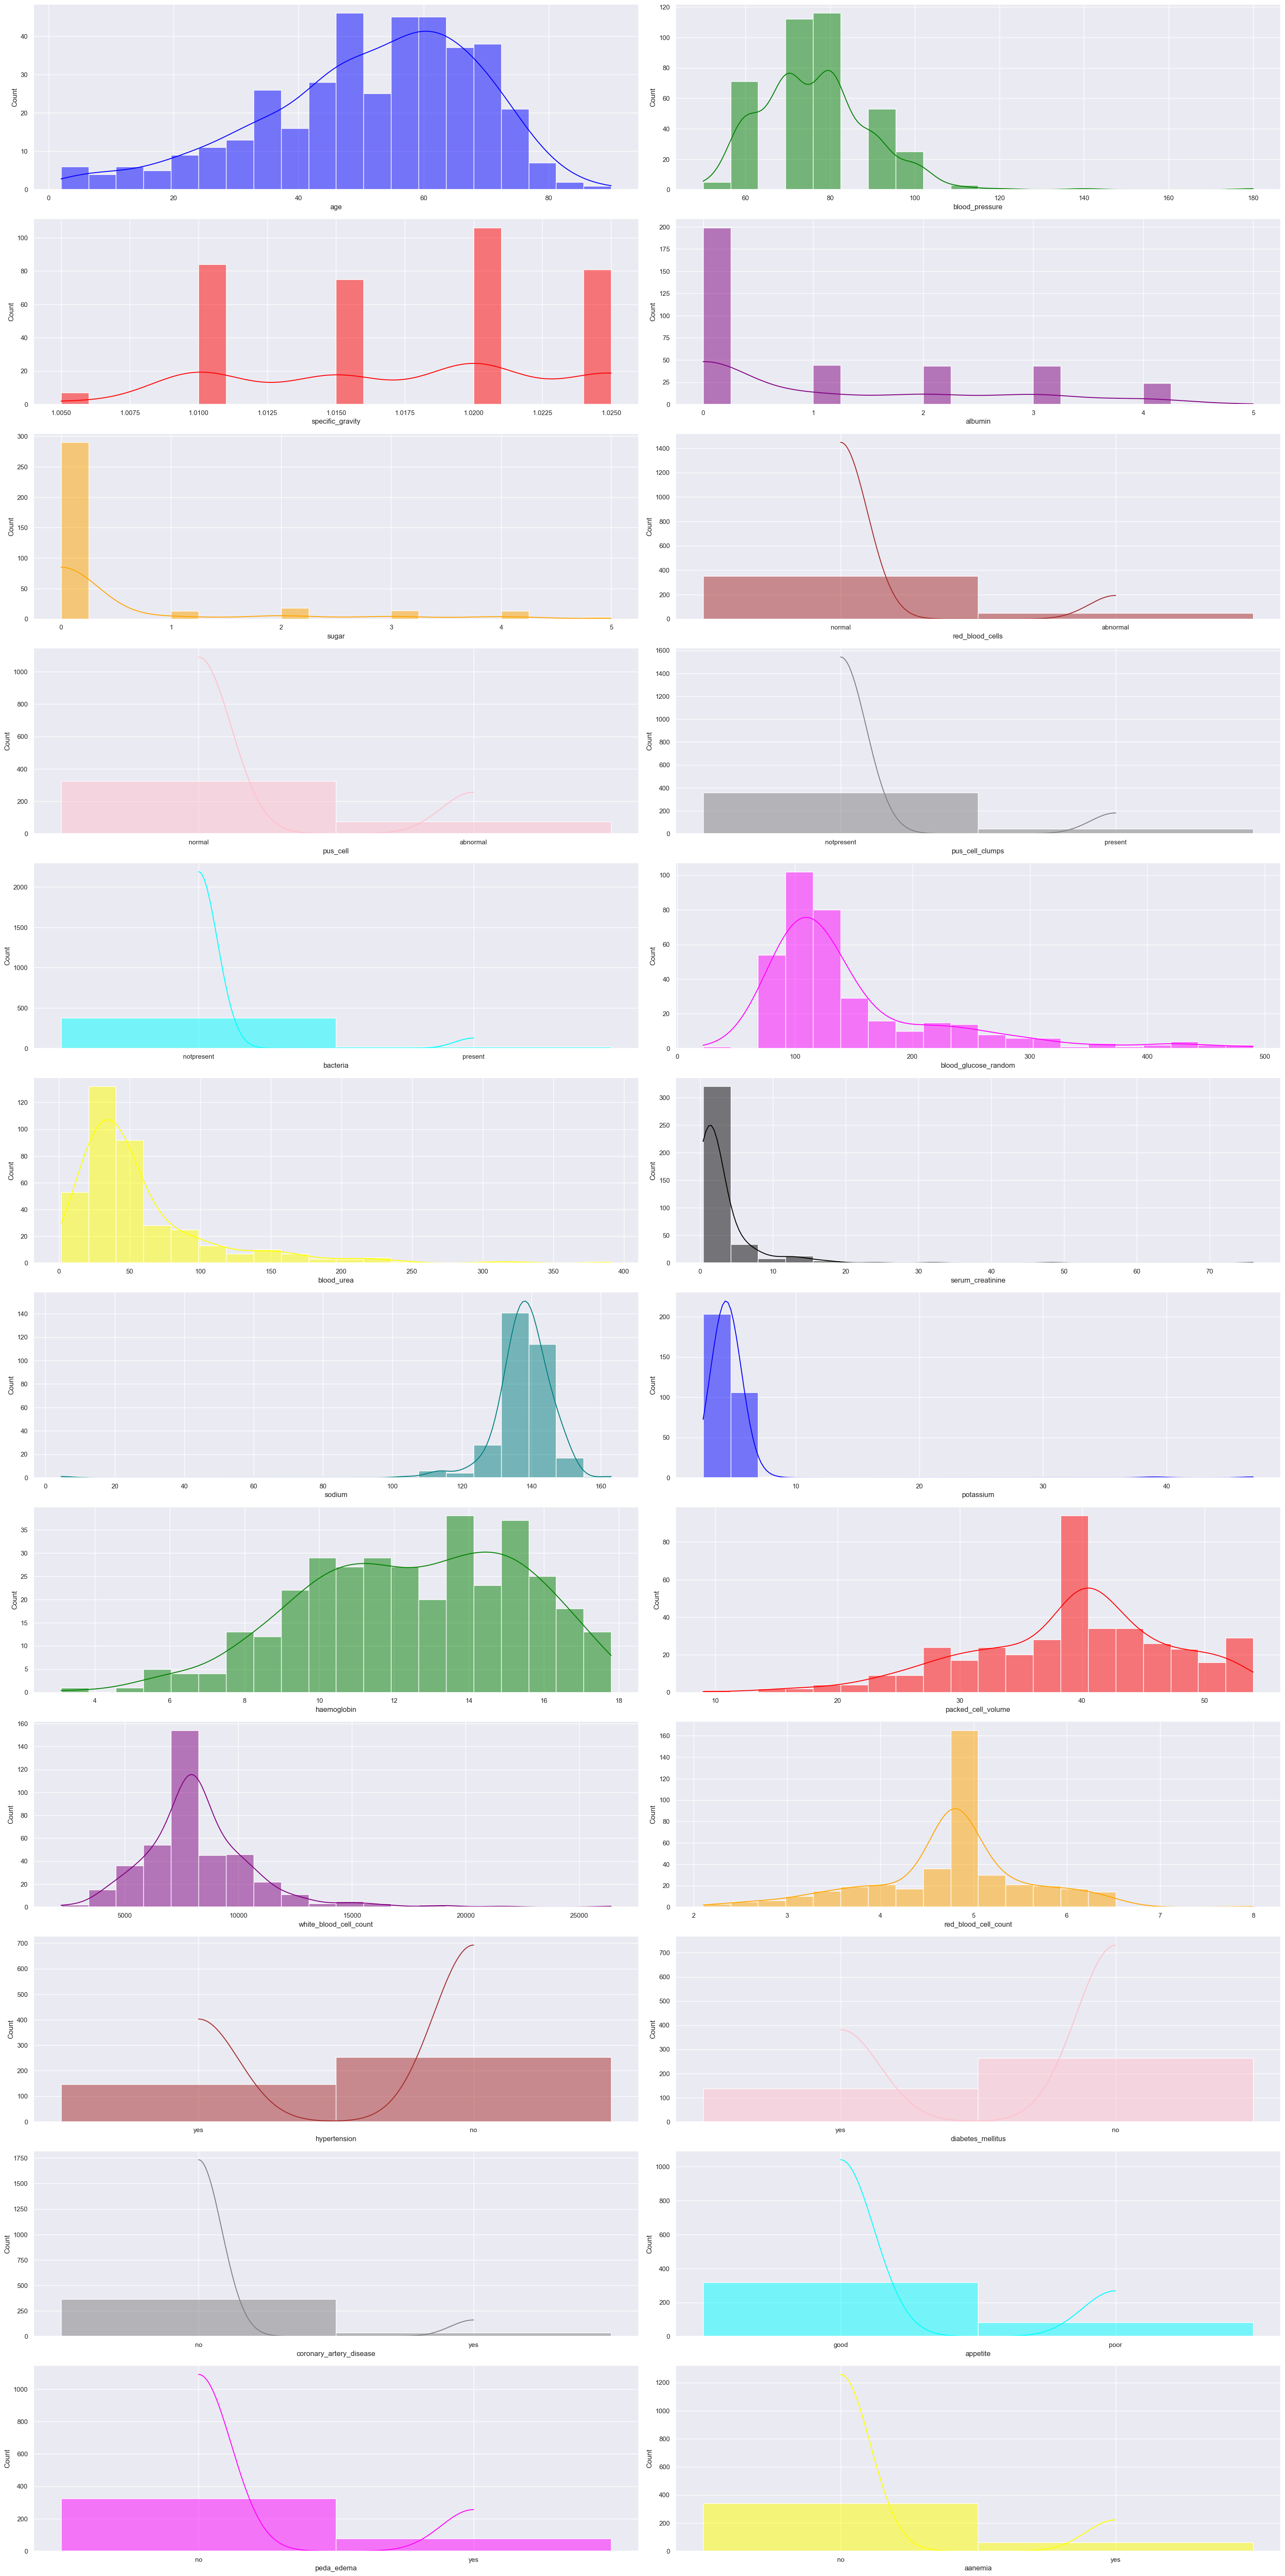

In [30]:
palette = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow', 'black', 'teal']

# Create subplots
fig, ax = plt.subplots(12, 2, figsize=(30, 60))

sns.histplot(data=data, x='age', bins=20, ax=ax[0, 0], color=palette[0], label='Age', kde=True)
sns.histplot(data=data, x='blood_pressure', bins=20, ax=ax[0, 1], color=palette[1], label='Blood Pressure', kde=True)
sns.histplot(data=data, x='specific_gravity', bins=20, ax=ax[1, 0], color=palette[2], label='Specific Gravity', kde=True)
sns.histplot(data=data, x='albumin', bins=20, ax=ax[1, 1], color=palette[3], label='Albumin', kde=True)
sns.histplot(data=data, x='sugar', bins=20, ax=ax[2, 0], color=palette[4], label='Sugar', kde=True)
sns.histplot(data=data, x='red_blood_cells', bins=20, ax=ax[2, 1], color=palette[5], label='Red Blood Cells', kde=True)
sns.histplot(data=data, x='pus_cell', bins=20, ax=ax[3, 0], color=palette[6], label='Pus Cell', kde=True)
sns.histplot(data=data, x='pus_cell_clumps', bins=20, ax=ax[3, 1], color=palette[7], label='Pus Cell Clumps', kde=True)
sns.histplot(data=data, x='bacteria', bins=20, ax=ax[4, 0], color=palette[8], label='Bacteria', kde=True)
sns.histplot(data=data, x='blood_glucose_random', bins=20, ax=ax[4, 1], color=palette[9], label='Blood Glucose Random', kde=True)
sns.histplot(data=data, x='blood_urea', bins=20, ax=ax[5, 0], color=palette[10], label='Blood Urea', kde=True)
sns.histplot(data=data, x='serum_creatinine', bins=20, ax=ax[5, 1], color=palette[11], label='Serum Creatinine', kde=True)
sns.histplot(data=data, x='sodium', bins=20, ax=ax[6, 0], color=palette[12], label='Sodium', kde=True)
sns.histplot(data=data, x='potassium', bins=20, ax=ax[6, 1], color=palette[0], label='Potassium', kde=True)
sns.histplot(data=data, x='haemoglobin', bins=20, ax=ax[7, 0], color=palette[1], label='Haemoglobin', kde=True)
sns.histplot(data=data, x='packed_cell_volume', bins=20, ax=ax[7, 1], color=palette[2], label='Packed Cell Volume', kde=True)
sns.histplot(data=data, x='white_blood_cell_count', bins=20, ax=ax[8, 0], color=palette[3], label='White Blood Cell Count', kde=True)
sns.histplot(data=data, x='red_blood_cell_count', bins=20, ax=ax[8, 1], color=palette[4], label='Red Blood Cell Count', kde=True)
sns.histplot(data=data, x='hypertension', bins=20, ax=ax[9, 0], color=palette[5], label='Hypertension', kde=True)
sns.histplot(data=data, x='diabetes_mellitus', bins=20, ax=ax[9, 1], color=palette[6], label='Diabetes Mellitus', kde=True)
sns.histplot(data=data, x='coronary_artery_disease', bins=20, ax=ax[10, 0], color=palette[7], label='Coronary Artery Disease', kde=True)
sns.histplot(data=data, x='appetite', bins=20, ax=ax[10, 1], color=palette[8], label='Appetite', kde=True)
sns.histplot(data=data, x='peda_edema', bins=20, ax=ax[11, 0], color=palette[9], label='Peda Edema', kde=True)
sns.histplot(data=data, x='aanemia', bins=20, ax=ax[11, 1], color=palette[10], label='Aanemia', kde=True)

# Adjust layout
plt.tight_layout()
plt.show()

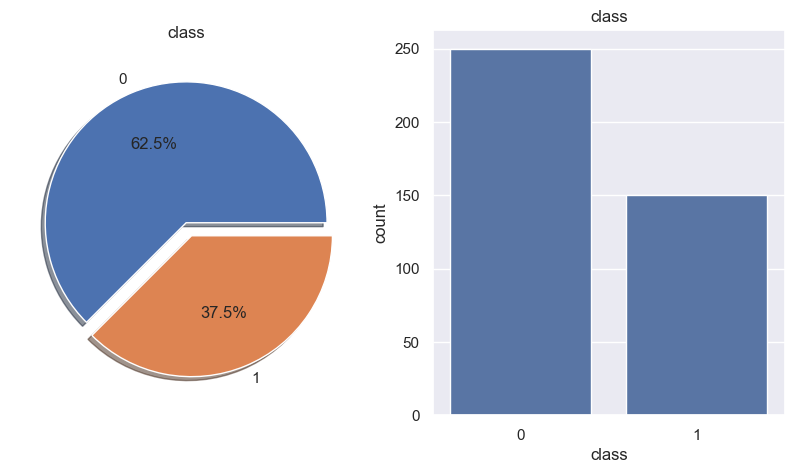

In [31]:
f,ax=plt.subplots(1,2, figsize=(10,5))
data['class'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", ax=ax[0] ,shadow=True)
ax[0].set_title('class')
ax[0].set_ylabel('')
sns.countplot(x='class', data=data, ax=ax[1])
ax[1].set_title('class')
plt.show()

In [32]:
#NaN in missing values

<Axes: >

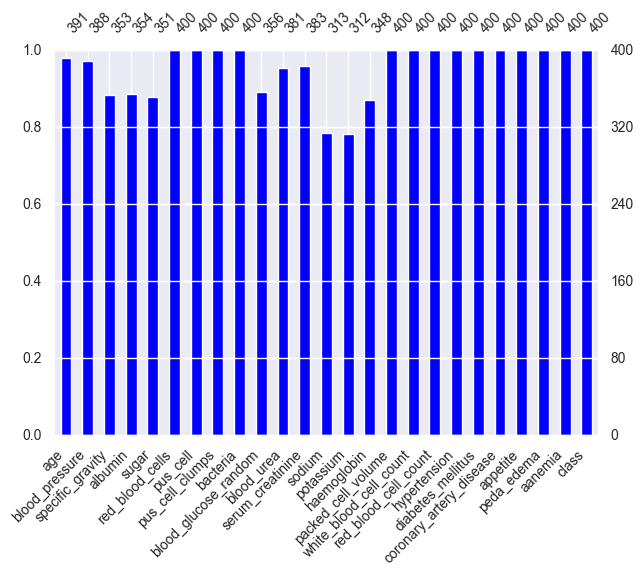

In [33]:
import missingno as msno
msno.bar(data,color='blue', figsize=[7,5] ,fontsize=10)

In [34]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = data[feature].dropna().sample(data[feature].isna().sum())
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)

In [35]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [36]:
data[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [37]:
#Now there are no any nan value

In [38]:
import matplotlib.pyplot as plt

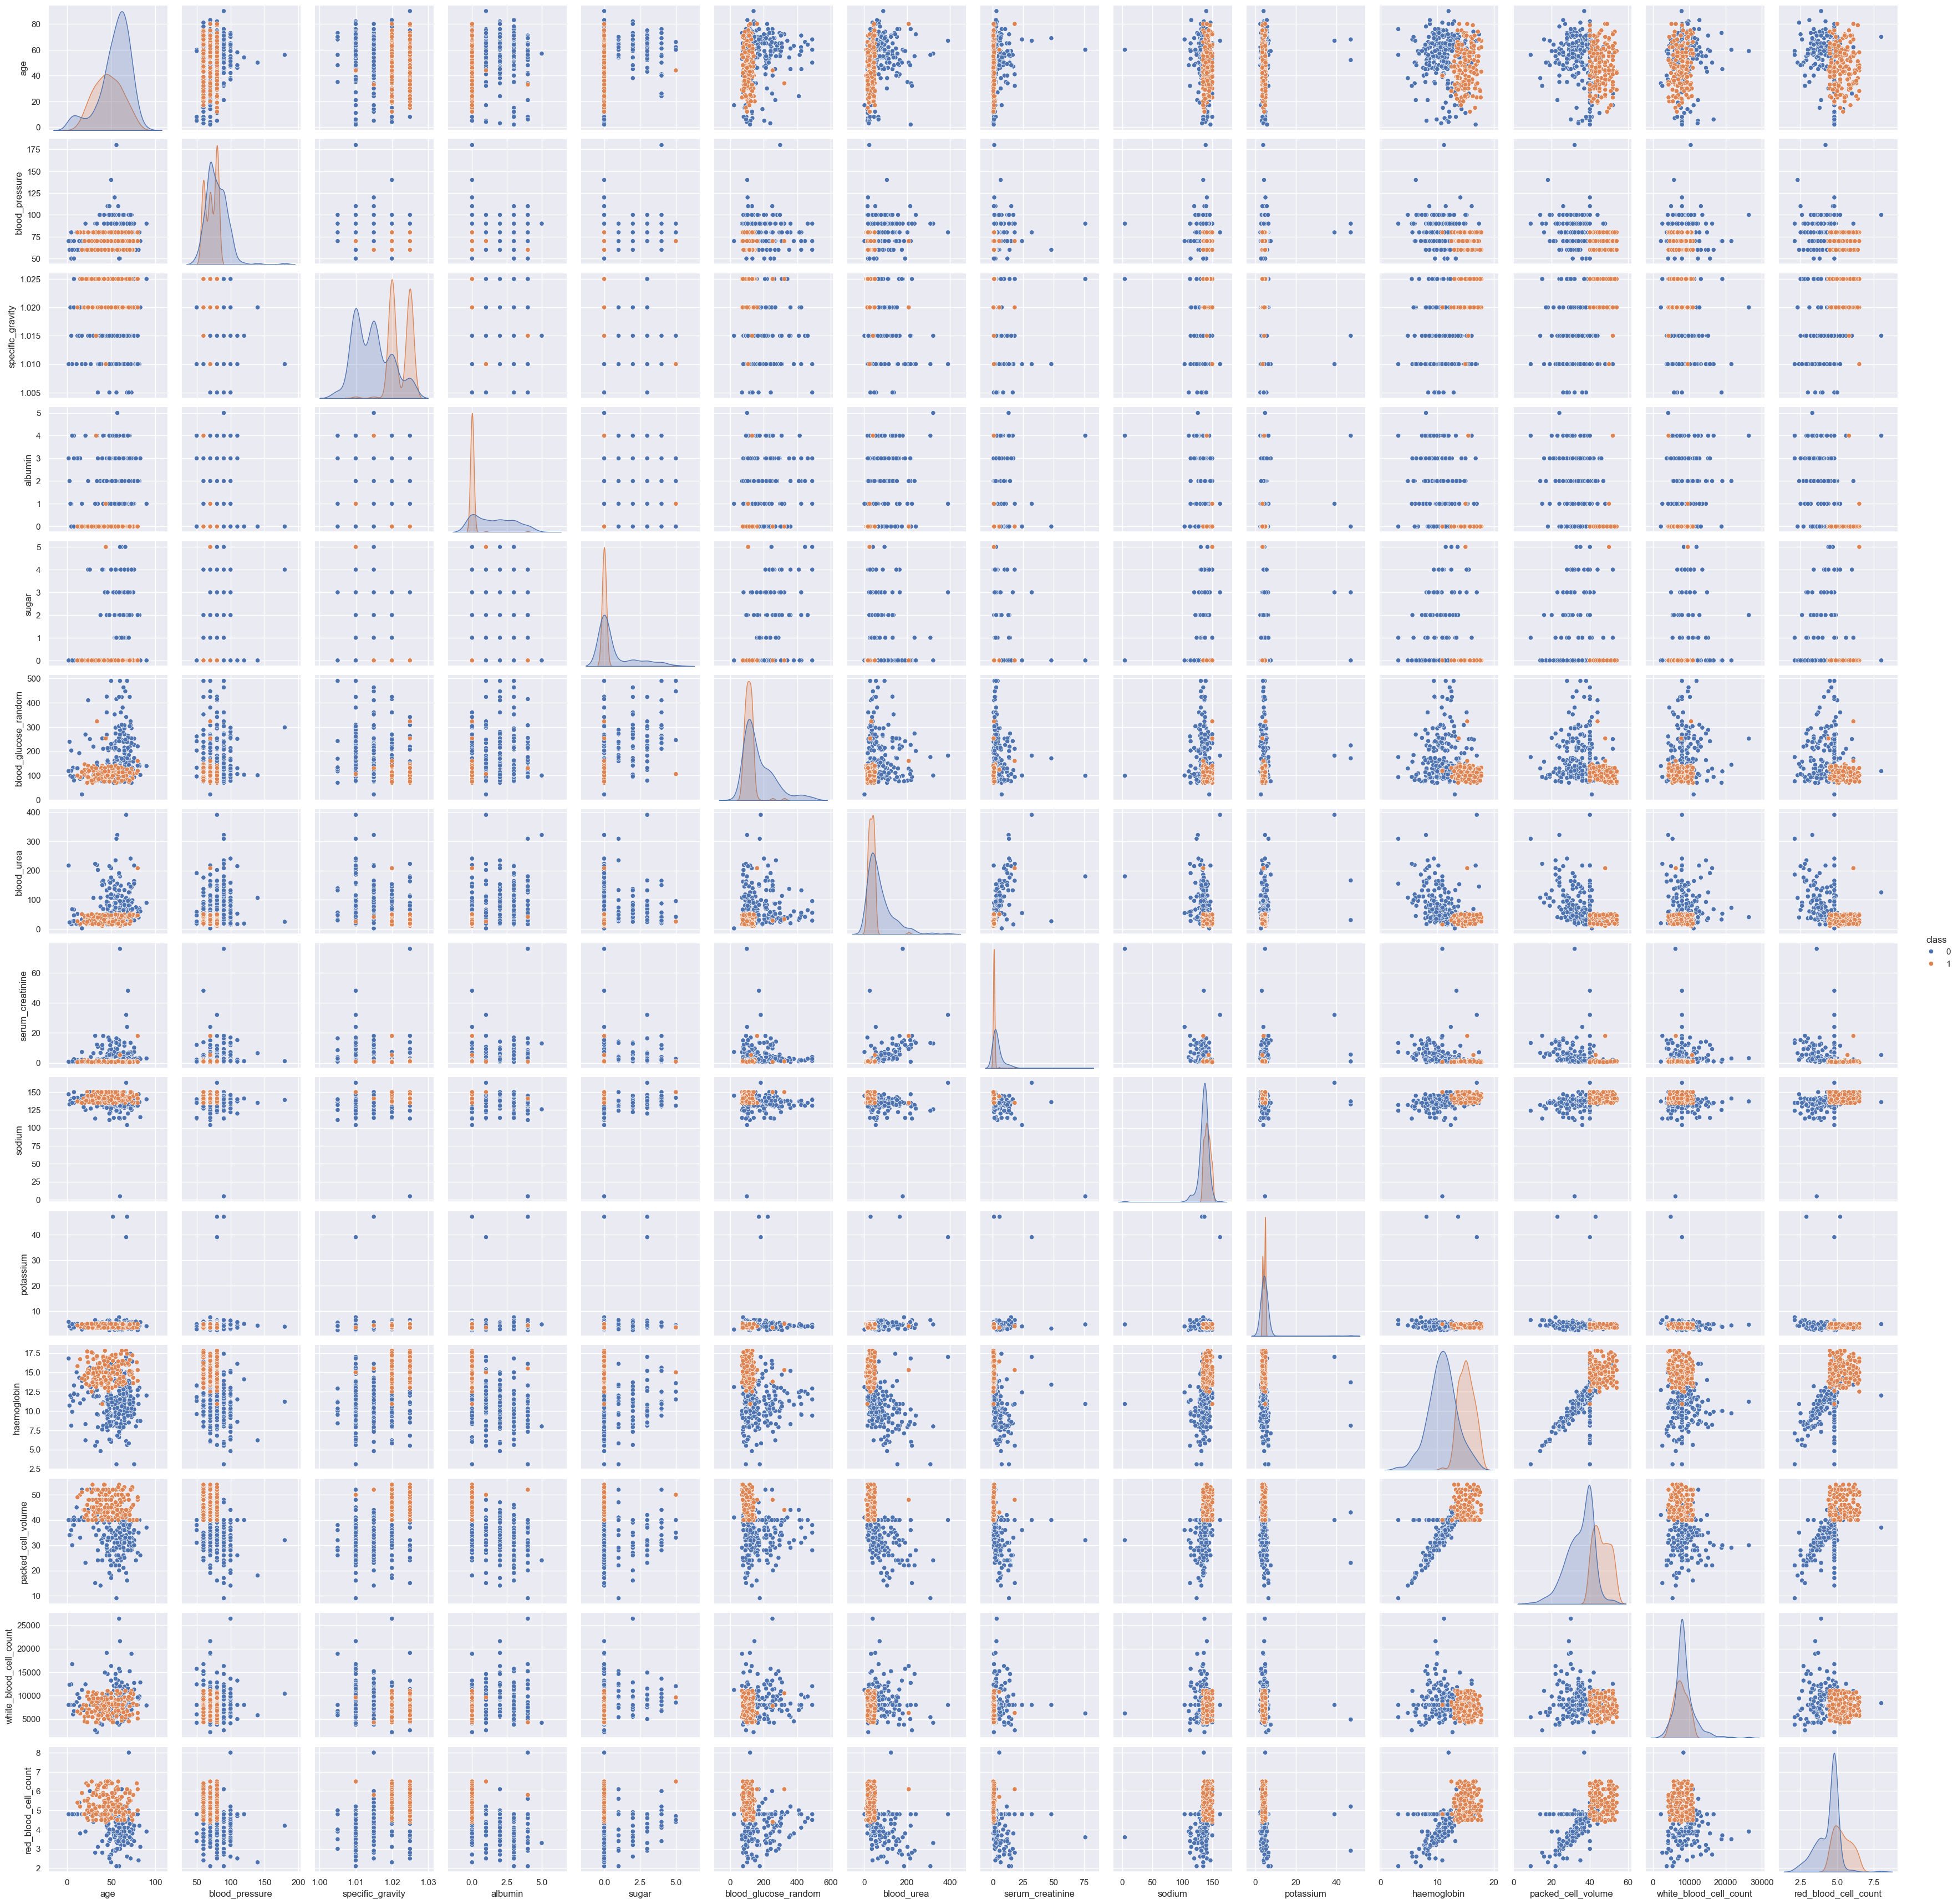

In [39]:
#pair plot
p = sns.pairplot(data, hue='class')

In [40]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']

for col in cat_cols:
    print(f"{col} has {data[col].unique()} values\n")

red_blood_cells has ['normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal'] values

pus_cell_clumps has ['notpresent' 'present'] values

bacteria has ['notpresent' 'present'] values

hypertension has ['yes' 'no'] values

diabetes_mellitus has ['yes' 'no'] values

coronary_artery_disease has ['no' 'yes'] values

appetite has ['good' 'poor'] values

peda_edema has ['no' 'yes'] values

aanemia has ['no' 'yes'] values



In [41]:
#All have two items.So replace them with 1 and 0

red_blood_cells has ['normal' as 0 'abnormal' as 1]

pus_cell has ['normal' as 0 'abnormal' as 1]

pus_cell_clumps has ['notpresent' as 0 'present' as 1]

bacteria has ['notpresent' as 0 'present' as 1]

hypertension has ['yes' as 1 'no' as 0] 

diabetes_mellitus has ['yes' as 1 'no' as 0] 

coronary_artery_disease has ['no' as 0 'yes' as 1]

appetite has ['good' as 1 'poor' as 0]

peda_edema has ['no' as 0 'yes' as 1] 

aanemia has ['no' as 0 'yes' as 1]

In [42]:
mappings = {
    'red_blood_cells': {'normal': 0, 'abnormal': 1},
    'pus_cell': {'normal': 0, 'abnormal': 1},
    'pus_cell_clumps': {'notpresent': 0, 'present': 1},
    'bacteria': {'notpresent': 0, 'present': 1},
    'hypertension': {'yes': 1, 'no': 0},
    'diabetes_mellitus': {'yes': 1, 'no': 0},
    'coronary_artery_disease': {'no': 0, 'yes': 1},
    'appetite': {'good': 1, 'poor': 0},
    'peda_edema': {'no': 0, 'yes': 1},
    'aanemia': {'no': 0, 'yes': 1}
}

In [43]:
for column, mapping in mappings.items():
    data[column] = data[column].replace(mapping)

C:\Users\USER\AppData\Local\Temp\ipykernel_11532\3640700159.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace(mapping)


In [44]:
data.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                0   
1   7.0            50.0             1.020      4.0    0.0                0   
2  62.0            80.0             1.010      2.0    3.0                0   
3  48.0            70.0             1.005      4.0    0.0                0   
4  51.0            80.0             1.010      2.0    0.0                0   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0         0                0         0                 121.0  ...   
1         0                0         0                 132.0  ...   
2         0                0         0                 423.0  ...   
3         1                1         0                 117.0  ...   
4         0                0         0                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   4.8   
2                31.0                  7500.0                   4.8   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         1   
1             0                  0                        0         1   
2             0                  1                        0         0   
3             1                  0                        0         0   
4             0                  0                        0         1   

   peda_edema  aanemia  class  
0           0        0      0  
1           0        0      0  
2           0        1      0  
3           1        1      0  
4           0        0      0  

[5 rows x 25 columns]

In [45]:
data.shape

(400, 25)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [53]:
has_object_dtype = any(data.dtypes == 'object')

# Print "Yes" or "No" based on the presence of object data type columns
print("Yes" if has_object_dtype else "No")

No


In [47]:
#Now all are in numeru=ic format

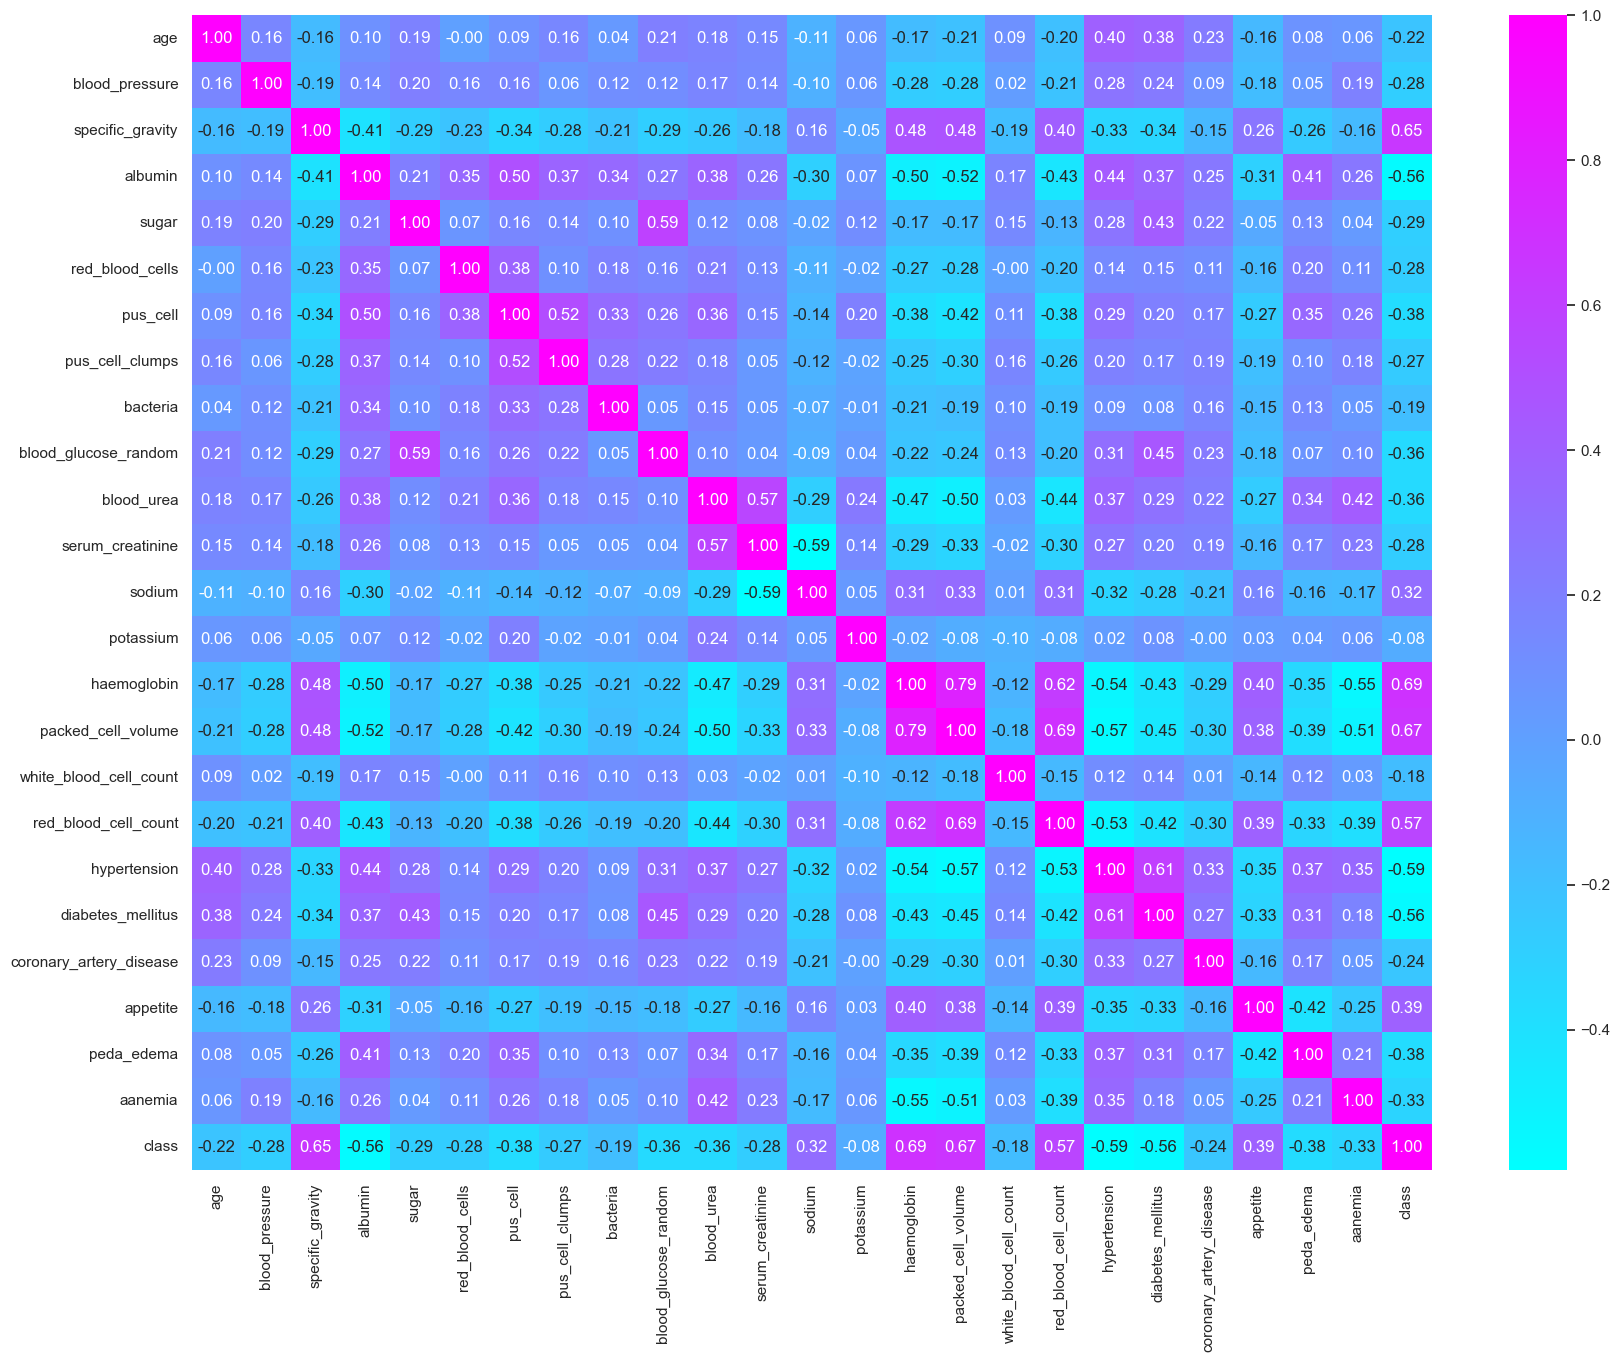

In [50]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt='.2f', ax=ax, cmap='cool')
plt.show()

In [49]:
data.corr()

age  blood_pressure  specific_gravity   albumin  \
age                      1.000000        0.162704         -0.164630  0.095713   
blood_pressure           0.162704        1.000000         -0.189470  0.135723   
specific_gravity        -0.164630       -0.189470          1.000000 -0.411324   
albumin                  0.095713        0.135723         -0.411324  1.000000   
sugar                    0.187397        0.203778         -0.285426  0.211278   
red_blood_cells         -0.000839        0.157922         -0.226146  0.349509   
pus_cell                 0.093919        0.161888         -0.338414  0.500296   
pus_cell_clumps          0.156265        0.064553         -0.277237  0.373752   
bacteria                 0.042229        0.115062         -0.210412  0.344098   
blood_glucose_random     0.205678        0.119473         -0.289944  0.267896   
blood_urea               0.184117        0.168506         -0.256119  0.376502   
serum_creatinine         0.145596        0.137245         -0.180623  0.263256   
sodium                  -0.108687       -0.096406          0.157511 -0.298096   
potassium                0.057081        0.061638         -0.050130  0.073355   
haemoglobin             -0.172340       -0.276451          0.476183 -0.497518   
packed_cell_volume      -0.205484       -0.283311          0.478014 -0.518158   
white_blood_cell_count   0.092621        0.016667         -0.187050  0.172773   
red_blood_cell_count    -0.200281       -0.214529          0.403795 -0.434718   
hypertension             0.400635        0.275386         -0.329898  0.436067   
diabetes_mellitus        0.375477        0.238083         -0.335513  0.366123   
coronary_artery_disease  0.229603        0.090761         -0.147666  0.246661   
appetite                -0.156658       -0.181256          0.263308 -0.307553   
peda_edema               0.082747        0.049270         -0.260012  0.411025   
aanemia                  0.062189        0.193327         -0.163352  0.257071   
class                   -0.222251       -0.284231          0.654031 -0.563488   

                            sugar  red_blood_cells  pus_cell  pus_cell_clumps  \
age                      0.187397        -0.000839  0.093919         0.156265   
blood_pressure           0.203778         0.157922  0.161888         0.064553   
specific_gravity        -0.285426        -0.226146 -0.338414        -0.277237   
albumin                  0.211278         0.349509  0.500296         0.373752   
sugar                    1.000000         0.070723  0.157193         0.143139   
red_blood_cells          0.070723         1.000000  0.377394         0.102948   
pus_cell                 0.157193         0.377394  1.000000         0.520118   
pus_cell_clumps          0.143139         0.102948  0.520118         1.000000   
bacteria                 0.101773         0.184402  0.330401         0.275082   
blood_glucose_random     0.590153         0.156264  0.262498         0.223028   
blood_urea               0.118563         0.212948  0.356648         0.176011   
serum_creatinine         0.083263         0.130509  0.150762         0.049316   
sodium                  -0.020435        -0.105161 -0.144592        -0.117983   
potassium                0.120354        -0.019862  0.197477        -0.016923   
haemoglobin             -0.167503        -0.273038 -0.376708        -0.253277   
packed_cell_volume      -0.170061        -0.279875 -0.418435        -0.296580   
white_blood_cell_count   0.145754        -0.003471  0.106733         0.163215   
red_blood_cell_count    -0.133103        -0.196534 -0.381949        -0.263810   
hypertension             0.275895         0.140538  0.291719         0.195623   
diabetes_mellitus        0.427029         0.145646  0.201032         0.165236   
coronary_artery_disease  0.219442         0.111493  0.172295         0.188029   
appetite                -0.052663        -0.160868 -0.274985        -0.189688   
peda_edema               0.128072         0.199285  0.350227

<Axes: >

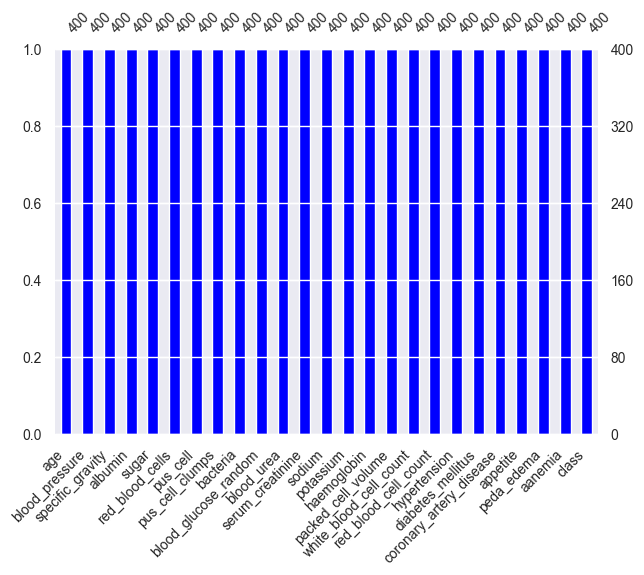

In [54]:
import missingno as msno
msno.bar(data,color='blue', figsize=[7,5] ,fontsize=10)

In [55]:
#And also there are no any missing value

In [56]:
#Detect outliers
#IQR

IQR is Q 3 − Q 1 

low outliers are below Q 1 − 1.5 ⋅ IQR ‍   -->    lower limit = Q 1 − 1.5 ⋅ IQR

high outliers are above Q 3 + 1.5 ⋅ IQR ‍  -->    upper limit = Q 3 + 1.5 ⋅ IQR

In [57]:
for feature in data:
    Q1= data[feature].quantile(0.25)
    Q3= data[feature].quantile(0.75)
    IQR = Q3- Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    if data[(data[feature]>upper)].any(axis=None):
        print(feature +"-","yes")
    else:
        print(feature +"-" ,"No")

age- No
blood_pressure- yes
specific_gravity- No
albumin- No
sugar- yes
red_blood_cells- yes
pus_cell- yes
pus_cell_clumps- yes
bacteria- yes
blood_glucose_random- yes
blood_urea- yes
serum_creatinine- yes
sodium- yes
potassium- yes
haemoglobin- No
packed_cell_volume- No
white_blood_cell_count- yes
red_blood_cell_count- yes
hypertension- No
diabetes_mellitus- No
coronary_artery_disease- yes
appetite- No
peda_edema- yes
aanemia- yes
class- No


<Axes: xlabel='age'>

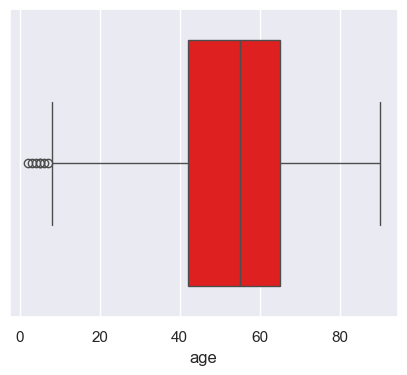

In [58]:
plt.figure(figsize=(5,4))
sns.boxplot(x=data["age"], color="red")

<Axes: xlabel='blood_pressure'>

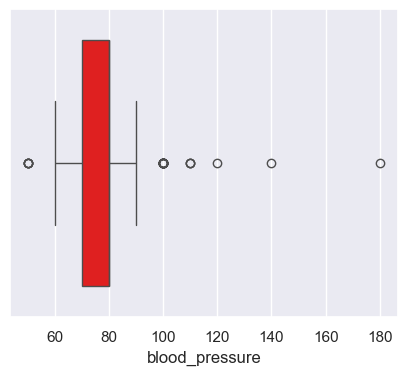

In [59]:
plt.figure(figsize=(5,4))
sns.boxplot(x=data["blood_pressure"], color="red")

<Axes: xlabel='blood_glucose_random'>

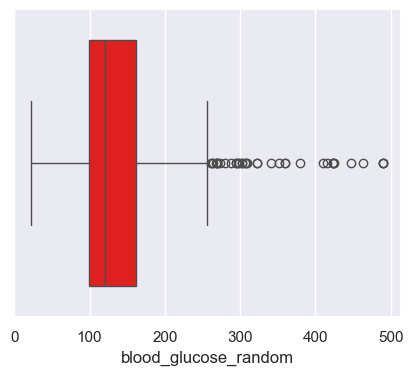

In [60]:
plt.figure(figsize=(5,4))
sns.boxplot(x=data["blood_glucose_random"], color="red")

<Axes: xlabel='age'>

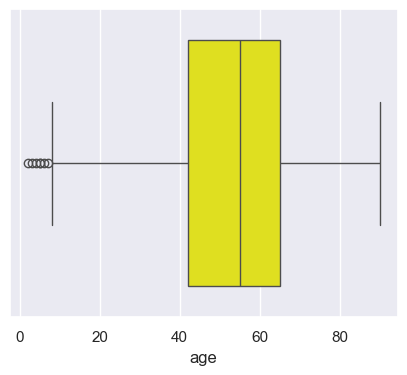

In [62]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data.loc[data['age'] > upper, 'age'] = upper

plt.figure(figsize=(5,4))
sns.boxplot(x=data["age"],color="yellow")

<Axes: xlabel='blood_pressure'>

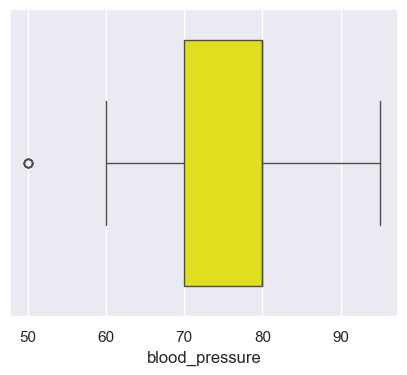

In [63]:
Q1 = data['blood_pressure'].quantile(0.25)
Q3 = data['blood_pressure'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data.loc[data['blood_pressure'] > upper, 'blood_pressure'] = upper

plt.figure(figsize=(5,4))
sns.boxplot(x=data["blood_pressure"],color="yellow")

<Axes: xlabel='blood_glucose_random'>

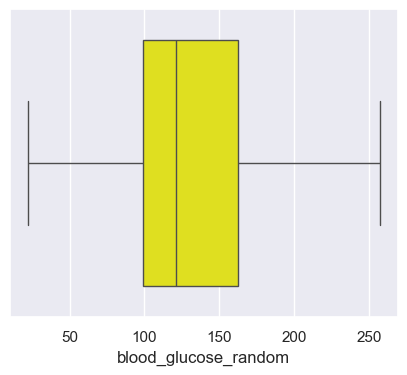

In [64]:
Q1 = data['blood_glucose_random'].quantile(0.25)
Q3 = data['blood_glucose_random'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data.loc[data['blood_glucose_random'] > upper, 'blood_glucose_random'] = upper

plt.figure(figsize=(5,4))
sns.boxplot(x=data["blood_glucose_random"],color="yellow")

In [65]:
#Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

In [66]:
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [67]:
data.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                0   
1   7.0            50.0             1.020      4.0    0.0                0   
2  62.0            80.0             1.010      2.0    3.0                0   
3  48.0            70.0             1.005      4.0    0.0                0   
4  51.0            80.0             1.010      2.0    0.0                0   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0         0                0         0               121.000  ...   
1         0                0         0               132.000  ...   
2         0                0         0               257.125  ...   
3         1                1         0               117.000  ...   
4         0                0         0               106.000  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   4.8   
2                31.0                  7500.0                   4.8   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         1   
1             0                  0                        0         1   
2             0                  1                        0         0   
3             1                  0                        0         0   
4             0                  0                        0         1   

   peda_edema  aanemia  class  
0           0        0      0  
1           0        0      0  
2           0        1      0  
3           1        1      0  
4           0        0      0  

[5 rows x 25 columns]

<Axes: xlabel='age'>

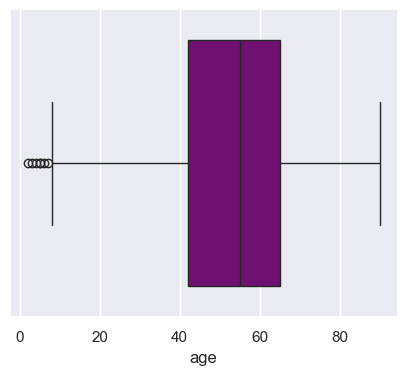

In [68]:
plt.figure(figsize=(5,4))
sns.boxplot(x=data["age"],color="purple")

<Axes: xlabel='blood_pressure'>

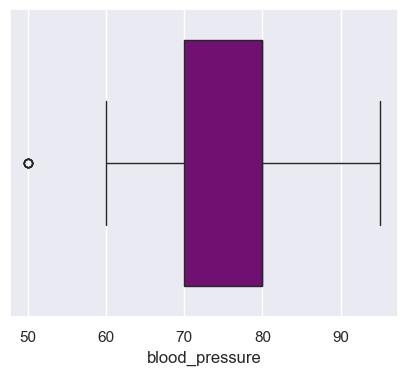

In [69]:
plt.figure(figsize=(5,4))
sns.boxplot(x=data["blood_pressure"],color="purple")

<Axes: xlabel='blood_glucose_random'>

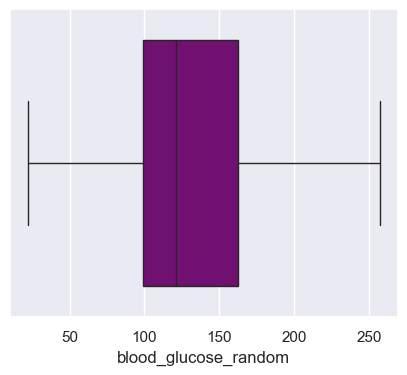

In [70]:
plt.figure(figsize=(5,4))
sns.boxplot(x=data["blood_glucose_random"],color="purple")

In [71]:
data_scores = lof.negative_outlier_factor_
np.sort(data_scores)[0:20]

array([-6.00544443, -4.99072536, -3.70636636, -2.87663859, -2.81984118,
       -2.75023345, -2.67484569, -2.56980803, -2.54750864, -2.49930614,
       -2.45274694, -2.44917508, -2.3552783 , -2.23506594, -2.10657342,
       -1.89060576, -1.76343496, -1.7478252 , -1.74010736, -1.6964296 ])

In [72]:
threshold=np.sort(data_scores)[7]
threshold

-2.569808032531936

In [73]:
outlier=data_scores>threshold
data=data[outlier]

In [74]:
data

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0    48.0            80.0             1.020      1.0    0.0                0   
1     7.0            50.0             1.020      4.0    0.0                0   
2    62.0            80.0             1.010      2.0    3.0                0   
3    48.0            70.0             1.005      4.0    0.0                0   
4    51.0            80.0             1.010      2.0    0.0                0   
..    ...             ...               ...      ...    ...              ...   
395  55.0            80.0             1.020      0.0    0.0                0   
396  42.0            70.0             1.025      0.0    0.0                0   
397  12.0            80.0             1.020      0.0    0.0                0   
398  17.0            60.0             1.025      0.0    0.0                0   
399  58.0            80.0             1.025      0.0    0.0                0   

     pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0           0                0         0               121.000  ...   
1           0                0         0               132.000  ...   
2           0                0         0               257.125  ...   
3           1                1         0               117.000  ...   
4           0                0         0               106.000  ...   
..        ...              ...       ...                   ...  ...   
395         0                0         0               140.000  ...   
396         0                0         0                75.000  ...   
397         0                0         0               100.000  ...   
398         0                0         0               114.000  ...   
399         0                0         0               131.000  ...   

     packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  44.0                  7800.0                   5.2   
1                  38.0                  6000.0                   4.8   
2                  31.0                  7500.0                   4.8   
3                  32.0                  6700.0                   3.9   
4                  35.0                  7300.0                   4.6   
..                  ...                     ...                   ...   
395                47.0                  6700.0                   4.9   
396                54.0                  7800.0                   6.2   
397                49.0                  6600.0                   5.4   
398                51.0                  7200.0                   5.9   
399                53.0                  6800.0                   6.1   

     hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0               1                  1                        0         1   
1               0                  0                        0         1   
2               0                  1                        0         0   
3               1                  0                        0         0   
4               0                  0                        0         1   
..            ...                ...                      ...       ...   
395             0                  0                        0         1   
396             0                  0                        0         1   
397             0                  0                        0         1   
398             0                  0                        0         1   
399             0                  0                        0         1   

     peda_edema  aanemia  class  
0             0        0      0  
1             0        0      0  
2             0        1      0  
3             1        1      0  
4             0        0      0  
..          ...      ...    ...  
395           0        0      1  
396           0        0      1  
397           0        0      1  
398           0        0      1  
399           0        0      1  

[392 

In [75]:
data.shape

(392, 25)

In [76]:
data.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                0   
1   7.0            50.0             1.020      4.0    0.0                0   
2  62.0            80.0             1.010      2.0    3.0                0   
3  48.0            70.0             1.005      4.0    0.0                0   
4  51.0            80.0             1.010      2.0    0.0                0   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0         0                0         0               121.000  ...   
1         0                0         0               132.000  ...   
2         0                0         0               257.125  ...   
3         1                1         0               117.000  ...   
4         0                0         0               106.000  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   4.8   
2                31.0                  7500.0                   4.8   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         1   
1             0                  0                        0         1   
2             0                  1                        0         0   
3             1                  0                        0         0   
4             0                  0                        0         1   

   peda_edema  aanemia  class  
0           0        0      0  
1           0        0      0  
2           0        1      0  
3           1        1      0  
4           0        0      0  

[5 rows x 25 columns]

In [77]:
from sklearn.preprocessing import RobustScaler

In [78]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [84]:
y = data['class']
x = data.drop(['class'], axis=1)

In [85]:
cols=x.columns
index=x.index

In [86]:
x.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                0   
1   7.0            50.0             1.020      4.0    0.0                0   
2  62.0            80.0             1.010      2.0    3.0                0   
3  48.0            70.0             1.005      4.0    0.0                0   
4  51.0            80.0             1.010      2.0    0.0                0   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0         0                0         0               121.000  ...   
1         0                0         0               132.000  ...   
2         0                0         0               257.125  ...   
3         1                1         0               117.000  ...   
4         0                0         0               106.000  ...   

   haemoglobin  packed_cell_volume  white_blood_cell_count  \
0         15.4                44.0                  7800.0   
1         11.3                38.0                  6000.0   
2          9.6                31.0                  7500.0   
3         11.2                32.0                  6700.0   
4         11.6                35.0                  7300.0   

   red_blood_cell_count  hypertension  diabetes_mellitus  \
0                   5.2             1                  1   
1                   4.8             0                  0   
2                   4.8             0                  1   
3                   3.9             1                  0   
4                   4.6             0                  0   

   coronary_artery_disease  appetite  peda_edema  aanemia  
0                        0         1           0        0  
1                        0         1           0        0  
2                        0         0           0        1  
3                        0         0           1        1  
4                        0         1           0        0  

[5 rows x 24 columns]

In [87]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [88]:
transformer = RobustScaler().fit(X)
X_transformed = transformer.transform(X)
x = pd.DataFrame(X_transformed, columns=X.columns, index=X.index)

In [89]:
x.head()

age  blood_pressure  specific_gravity  albumin  sugar  \
0 -0.304348             0.0               0.0      0.5    0.0   
1 -2.086957            -3.0               0.0      2.0    0.0   
2  0.304348             0.0              -1.0      1.0    3.0   
3 -0.304348            -1.0              -1.5      2.0    0.0   
4 -0.173913             0.0              -1.0      1.0    0.0   

   red_blood_cells  pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  \
0              0.0       0.0              0.0       0.0              0.007905   
1              0.0       0.0              0.0       0.0              0.181818   
2              0.0       0.0              0.0       0.0              2.160079   
3              0.0       1.0              1.0       0.0             -0.055336   
4              0.0       0.0              0.0       0.0             -0.229249   

   ...  haemoglobin  packed_cell_volume  white_blood_cell_count  \
0  ...     0.595745                 0.4               -0.082474   
1  ...    -0.276596                -0.2               -0.824742   
2  ...    -0.638298                -0.9               -0.206186   
3  ...    -0.297872                -0.8               -0.536082   
4  ...    -0.212766                -0.5               -0.288660   

   red_blood_cell_count  hypertension  diabetes_mellitus  \
0              0.666667           1.0                1.0   
1              0.000000           0.0                0.0   
2              0.000000           0.0                1.0   
3             -1.500000           1.0                0.0   
4             -0.333333           0.0                0.0   

   coronary_artery_disease  appetite  peda_edema  aanemia  
0                      0.0       0.0         0.0      0.0  
1                      0.0       0.0         0.0      0.0  
2                      0.0      -1.0         0.0      1.0  
3                      0.0      -1.0         1.0      1.0  
4                      0.0       0.0         0.0      0.0  

[5 rows x 24 columns]

In [94]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Machine Learning Algorithm**

In [97]:
from sklearn.metrics import accuracy_score, classification_report

In [102]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

In [103]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
y_predict=log_reg.predict(X_test)
print(accuracy_score(y_train,log_reg.predict(X_train)))
print(accuracy_score(y_test,log_reg.predict(X_test)))
print(classification_report(y_test,y_predict))

0.9137380191693291
0.8860759493670886
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        50
           1       0.83      0.86      0.85        29

    accuracy                           0.89        79
   macro avg       0.88      0.88      0.88        79
weighted avg       0.89      0.89      0.89        79



In [105]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [107]:
y_predict=knn.predict(X_test)
print(accuracy_score(y_train,knn.predict(X_train)))
print(accuracy_score(y_test,knn.predict(X_test)))
print(classification_report(y_test,y_predict))

0.8083067092651757
0.7215189873417721
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        50
           1       0.60      0.72      0.66        29

    accuracy                           0.72        79
   macro avg       0.71      0.72      0.71        79
weighted avg       0.74      0.72      0.73        79



In [108]:
#SVM
from sklearn.svm import SVC

In [109]:
svc=SVC(probability=True)
parameter={
    "gamma":[0.0001,0.001,0.01,0.1],
    'C':[0.01,0.05,0.5,0.01,1,10.,15,20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10.0, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [110]:
# best_parameter
grid_search.best_params_

{'C': 10.0, 'gamma': 0.001}

In [111]:
grid_search.best_score_

0.7798259088581669

In [112]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)

y_predict = svc.predict(X_test)

print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))

1.0
0.6329113924050633


In [113]:
from sklearn.metrics import confusion_matrix

In [114]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[50  0]
 [29  0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.78        50
           1       0.00      0.00      0.00        29

    accuracy                           0.63        79
   macro avg       0.32      0.50      0.39        79
weighted avg       0.40      0.63      0.49        79



C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [115]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [116]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_predict = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

1.0
0.9493670886075949
[[47  3]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.90      0.97      0.93        29

    accuracy                           0.95        79
   macro avg       0.94      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79



In [117]:
# hyperparameter tuning of dt
from sklearn.model_selection import GridSearchCV, train_test_split

grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
44000 fits failed out of a total of 60000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12609 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    va

GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [118]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [119]:
grid_search_dt.best_score_

0.9842857142857143

In [120]:
DT = grid_search_dt.best_estimator_
y_predict = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.987220447284345
0.9240506329113924
[[46  4]
 [ 2 27]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.87      0.93      0.90        29

    accuracy                           0.92        79
   macro avg       0.91      0.93      0.92        79
weighted avg       0.93      0.92      0.92        79



In [121]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [122]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [123]:
y_pred = rand_clf.predict(X_test)

In [124]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.9873417721518988
[[50  0]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.98        29

    accuracy                           0.99        79
   macro avg       0.99      0.98      0.99        79
weighted avg       0.99      0.99      0.99        79



In [125]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [126]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [127]:
grid_search_gbc.best_score_

0.9904233870967742

In [128]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [129]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.9493670886075949
[[48  2]
 [ 2 27]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       0.93      0.93      0.93        29

    accuracy                           0.95        79
   macro avg       0.95      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79



In [130]:
from xgboost import XGBClassifier 

In [131]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [132]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9904153354632588
0.9746835443037974
[[50  0]
 [ 2 27]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.93      0.96        29

    accuracy                           0.97        79
   macro avg       0.98      0.97      0.97        79
weighted avg       0.98      0.97      0.97        79



In [133]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 
              'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100 * round(log_reg_acc, 4), 100 * round(knn_acc, 4), 100 * round(svc_acc, 4),
              100 * round(dt_acc, 4), 100 * round(rand_acc, 4), 100 * round(gbc_acc, 4),
              100 * round(xgb_acc, 4)]
})

models.sort_values(by='Score', ascending=False)

Model  Score
4      Random Forest Classifier  98.73
6                       XgBoost  97.47
5  Gradient Boosting Classifier  94.94
3      Decision Tree Classifier  92.41
0           Logistic Regression  88.61
1                           KNN  72.15
2                           SVM  63.29

In [134]:
import pickle

In [135]:
# Train the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Save the trained model
with open('kidney.pickle', 'wb') as file:
    pickle.dump(model, file)

print("Model trained and saved successfully.")


if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
    print("Feature names:", feature_names)
    print(f"Number of features: {X_train.shape[1]}")
else:
    print("X_train is not a DataFrame.")
print(type(X_train))

Model trained and saved successfully.
Feature names: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia']
Number of features: 24
<class 'pandas.core.frame.DataFrame'>
